In [58]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Once mounted, you can access files in your Google Drive like this:
file_path = '/content/drive/My Drive/Dear/patient_counts13.xlsx'

# Read data from Excel file
df = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Select the features for clustering (replace with your chosen features)
# features = ["Patients","Patients_1_Days_Before","Patients_2_Days_Before","Patients_3_Days_Before","Patients_4_Days_Before","Patients_5_Days_Before","Patients_6_Days_Before","Patients_7_Days_Before","Patients_8_Days_Before","Patients_9_Days_Before","Patients_10_Days_Before"]
features = ["Patients"]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[40066.08083282295, 14790.049661635026, 7608.813739615543, 4784.204931292163, 3000.7292075669675, 2169.802570113575, 1704.9535356453853, 1356.130759158017, 1124.571050046639]


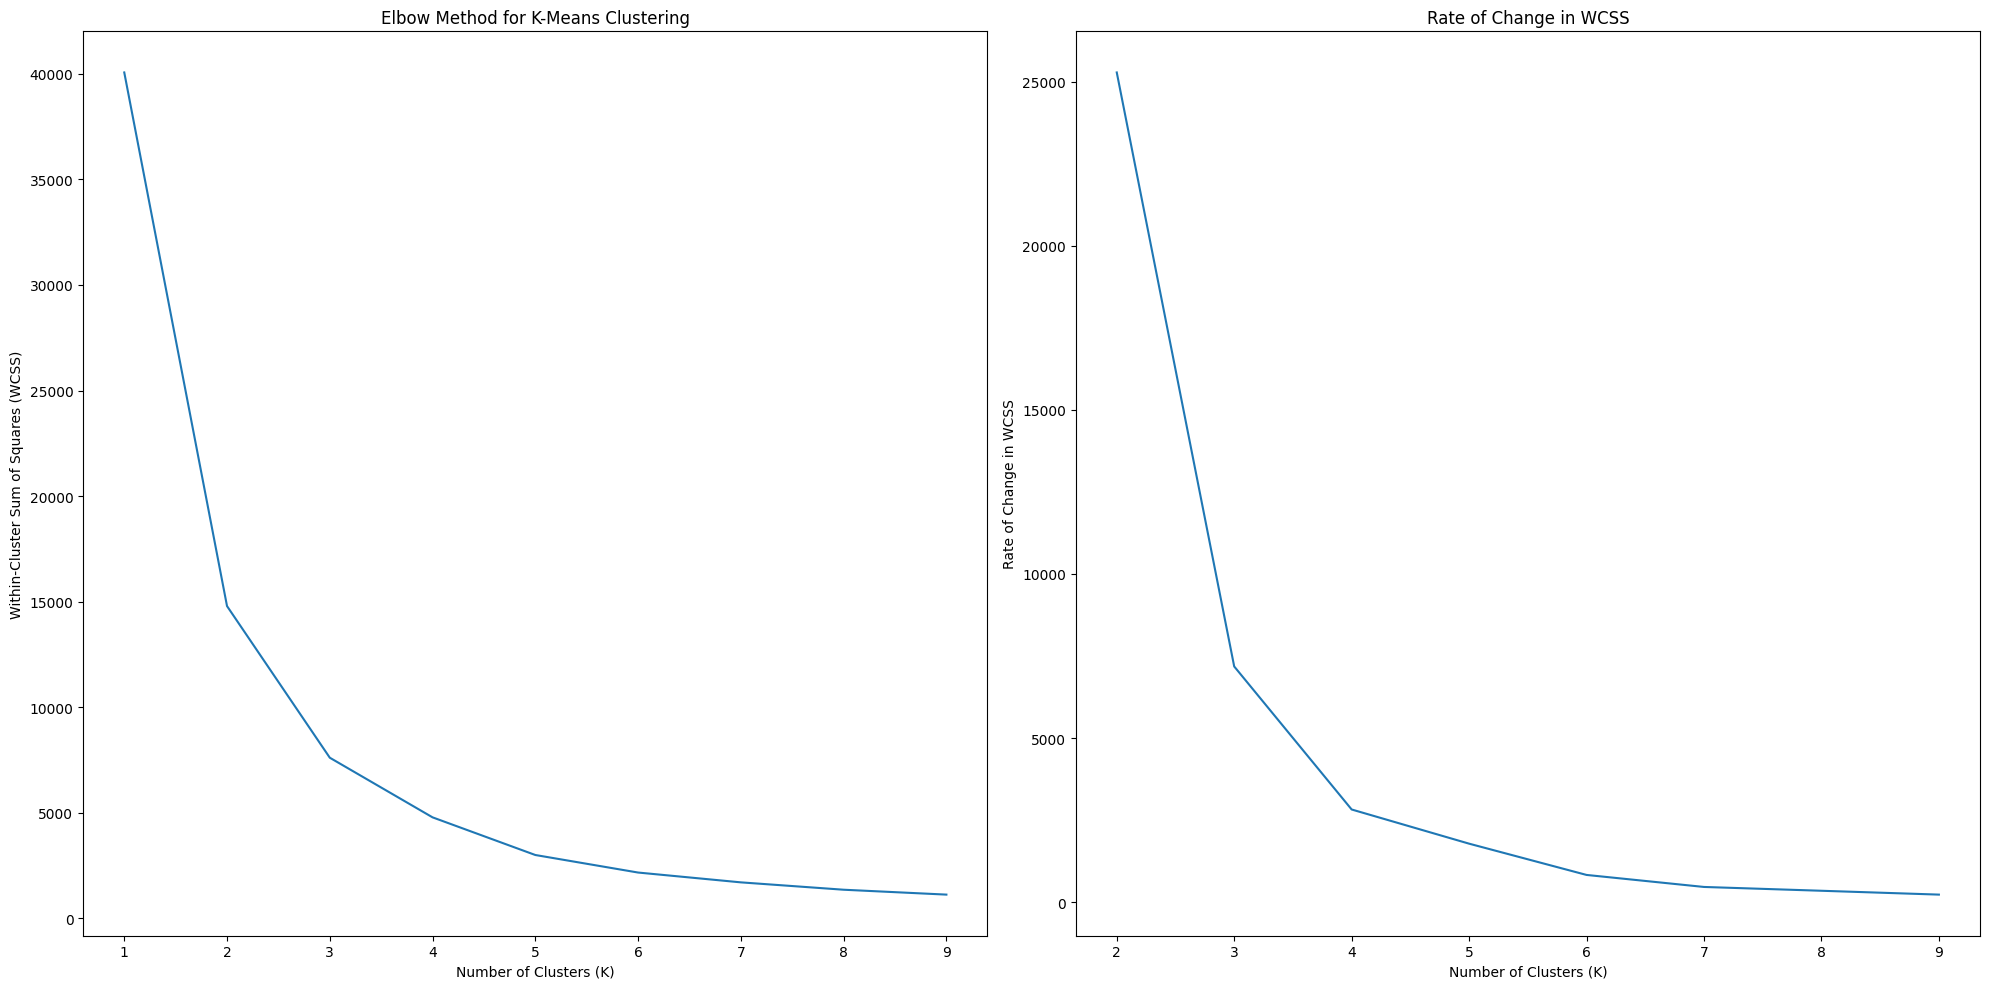

In [60]:
# Calculate WCSS as before
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_range = range(1, 10)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

# Calculate rate of change in WCSS
rate_of_change = []
for i in range(1, len(wcss)):
    rate_of_change.append(wcss[i-1] - wcss[i])

# Plot WCSS vs. K and rate of change vs. K
plt.figure(figsize=(20, 10))

print(wcss)

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for K-Means Clustering")

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], rate_of_change)  # Exclude the first rate of change (undefined)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Rate of Change in WCSS")
plt.title("Rate of Change in WCSS")

plt.tight_layout()
plt.show()


In [46]:
# Print WCSS values
print("WCSS Values:")
for k, value in zip(k_range, wcss):
  print(f"K={k}: {value}")

# Print rate of change values (excluding the first undefined value)
print("\nRate of Change in WCSS:")
for k, value in zip(k_range[1:], rate_of_change):
  print(f"K={k}: {value}")

WCSS Values:
K=1: 40066.08083282295
K=2: 14650.357381714563
K=3: 7608.813739615543
K=4: 4808.745277671762
K=5: 3074.178467738878
K=6: 2169.802570113575
K=7: 1699.2410949554512
K=8: 1271.4926294193638
K=9: 1056.401436859414

Rate of Change in WCSS:
K=2: 25415.723451108384
K=3: 7041.543642099019
K=4: 2800.0684619437816
K=5: 1734.5668099328836
K=6: 904.3758976253034
K=7: 470.5614751581236
K=8: 427.74846553608745
K=9: 215.09119255994983


In [47]:
degree = []
for i in range(8):
  tan_value = rate_of_change[i]
  # Calculate the angle in radians using arctan (inverse tangent)
  angle_radians = np.arctan(tan_value)
  # Convert radians to degrees (if needed)
  angle_degrees = np.degrees(angle_radians)
  degree.append(angle_degrees)

print(degree)


angle = []
for i in range(7):
  y = 180 - degree[i]
  x = 180 - y - degree [i+1]
  angle.append(x)

print(angle)

# Find the index of the maximum value in angle
max_value = max(angle)  # Use built-in max function
max_index = angle.index(max_value)  # Find index of the maximum value

print("Maximum angle:", max_value)
print("Index of maximum angle:", max_index)








[89.99774565616462, 89.99186317914933, 89.97953772278933, 89.96696825233988, 89.93664608232854, 89.87823972788642, 89.86605287979258, 89.7336229065407]
[0.005882477015290988, 0.012325456360002818, 0.012569470449449227, 0.030322170011345406, 0.05840635444211273, 0.012186848093847402, 0.1324299732518739]
Maximum angle: 0.1324299732518739
Index of maximum angle: 6


## Clustering for K = 2

In [48]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df[features])

# Assign cluster labels to each data point
df["cluster"] = kmeans.labels_

# Save results to a new Excel file
output_file_path = '/content/drive/My Drive/Dear/New_Approach/clustering.xlsx'
df.to_excel(output_file_path, index=False)

print("Clustering results saved to:", output_file_path)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering results saved to: /content/drive/My Drive/Dear/New_Approach/clustering.xlsx


## Clustering for K = 3

In [49]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[features])

# Assign cluster labels to each data point
df["cluster"] = kmeans.labels_

# Save results to a new Excel file
output_file_path = '/content/drive/My Drive/Dear/New_Approach/clustering_K_3.xlsx'
df.to_excel(output_file_path, index=False)

print("Clustering results saved to:", output_file_path)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering results saved to: /content/drive/My Drive/Dear/New_Approach/clustering_K_3.xlsx


Best epsilon: 0.1, Best min_samples: 2, Best silhouette score: 0.9964537797612976


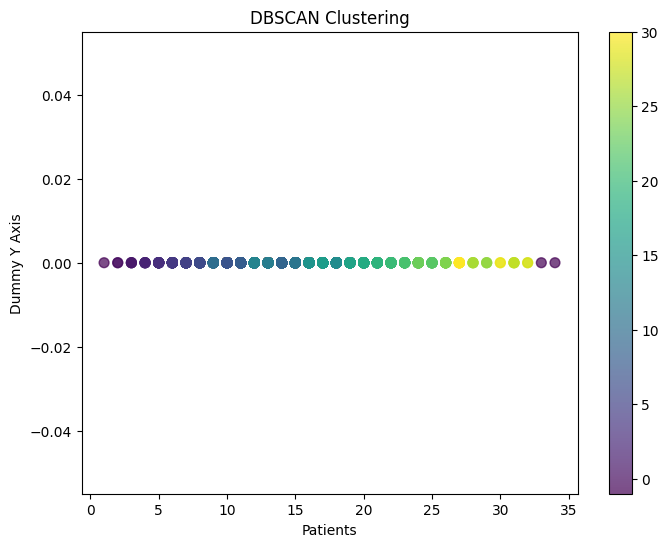

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is defined earlier and contains the "Patients" column

# Extract the feature for clustering
features = ["Patients"]
data = df[features].values  # Extracting the values of the "Patients" column

# Initialize parameters for DBSCAN
epsilon_values = np.linspace(0.1, 2.0, num=20)  # Example range of epsilon values
min_samples_values = range(2, 5)  # Example range of min_samples values

# Calculate silhouette scores for different combinations of epsilon and min_samples
silhouette_scores = []

for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)

        # Check if DBSCAN found more than one cluster
        if len(np.unique(dbscan.labels_)) > 1:
            # Silhouette score can be used to evaluate the clustering quality
            silhouette_score_value = silhouette_score(data, dbscan.labels_)
            silhouette_scores.append((eps, min_samples, silhouette_score_value))
        else:
            silhouette_scores.append((eps, min_samples, -1))  # Assign a negative score if only one cluster is found

# Filter out combinations where only one cluster was found
silhouette_scores = [score for score in silhouette_scores if score[2] != -1]

# Find the combination with the highest silhouette score
best_eps, best_min_samples, best_score = max(silhouette_scores, key=lambda x: x[2])
print(f"Best epsilon: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")

# Visualize the clustering results with the best parameters (example plot)
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan.fit(data)

# Plot the clusters (example plot)
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], np.zeros_like(data[:, 0]), c=best_dbscan.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Patients')
plt.ylabel('Dummy Y Axis')  # Dummy Y Axis for visualization
plt.colorbar()
plt.show()


In [12]:
from sklearn.cluster import DBSCAN

# Assuming best_eps and best_min_samples are determined from previous steps
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan.fit(data)  # data should be your feature data for clustering

# Count unique labels (excluding noise points, labeled as -1)
unique_labels = np.unique(best_dbscan.labels_)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"Number of clusters identified by DBSCAN: {num_clusters}")


Number of clusters identified by DBSCAN: 31


### Silhouette analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

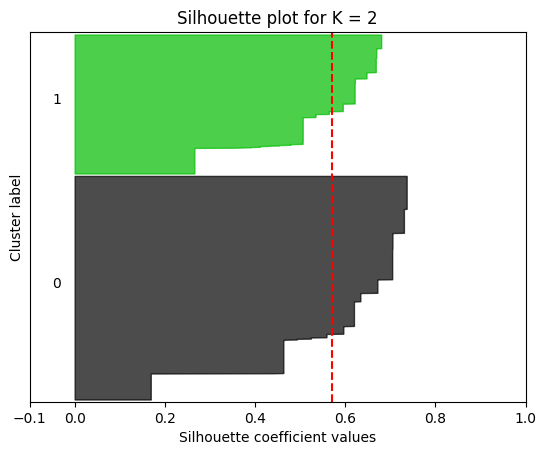

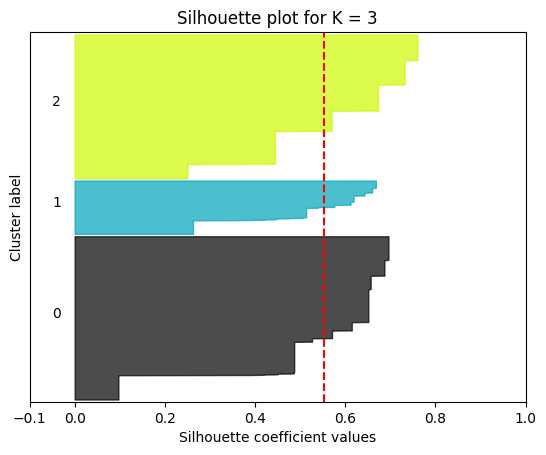

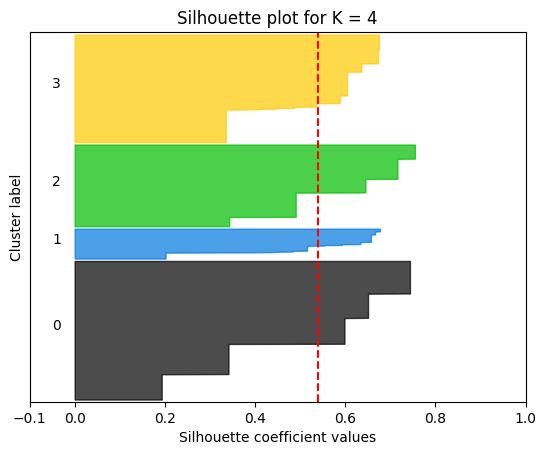

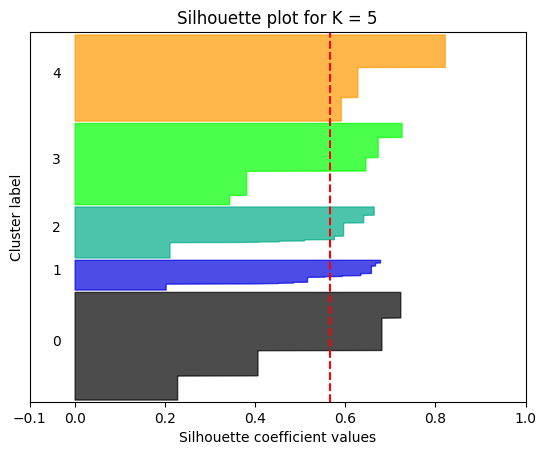

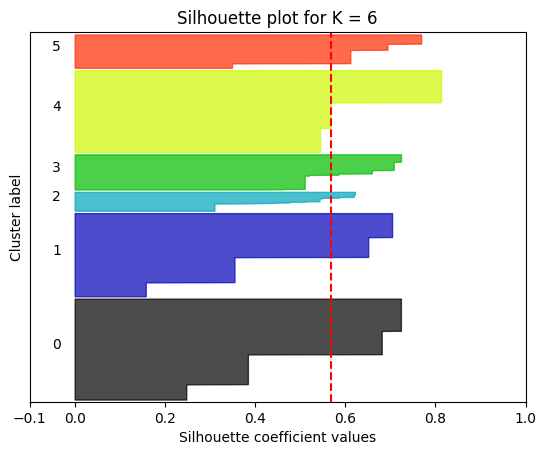

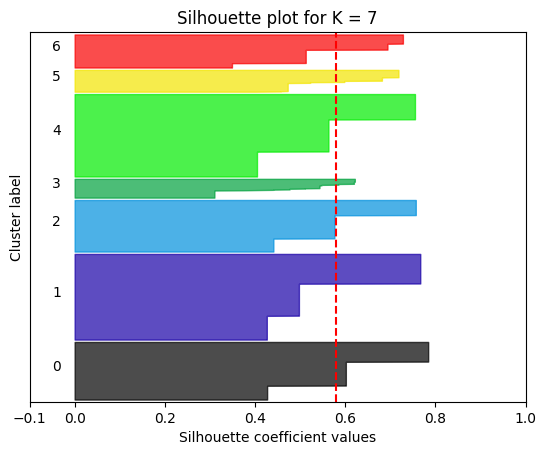

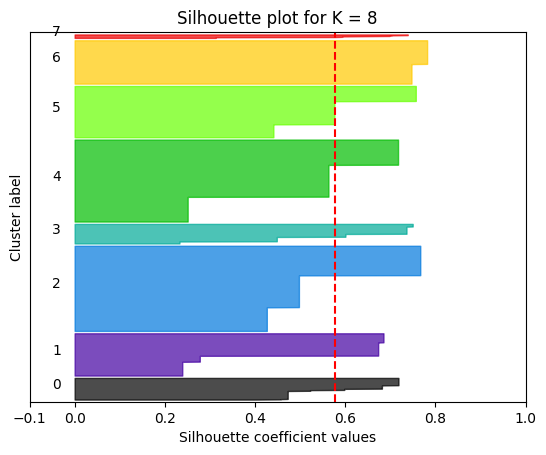

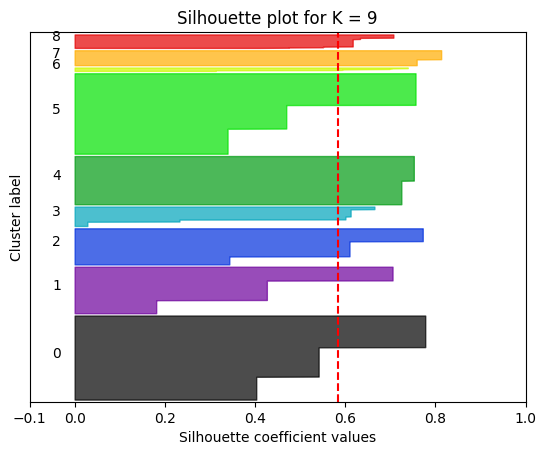

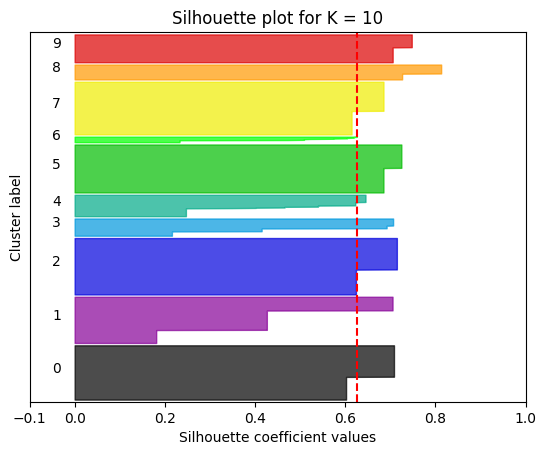

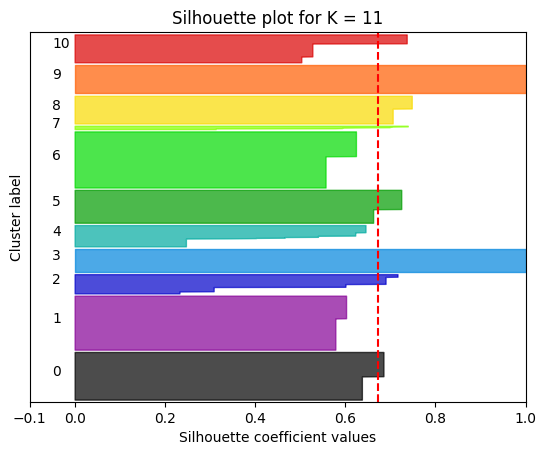

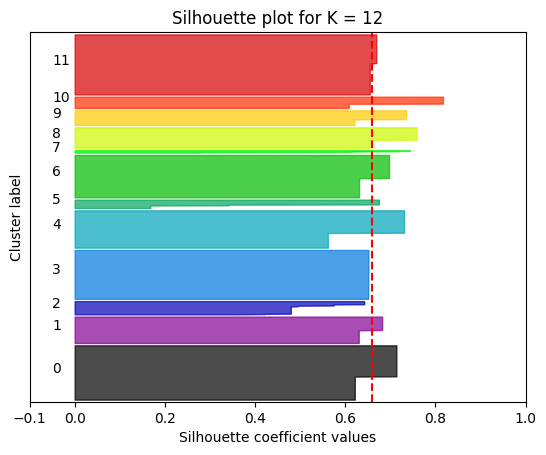

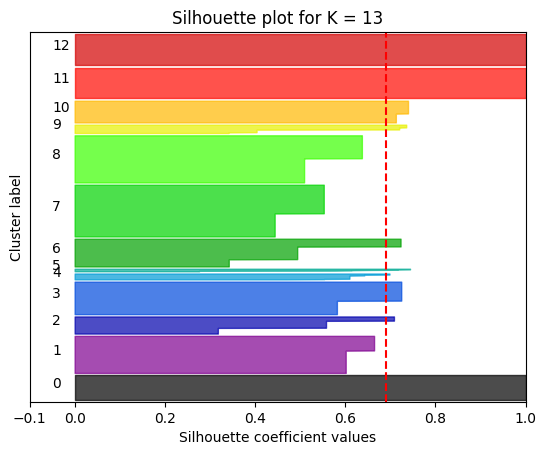

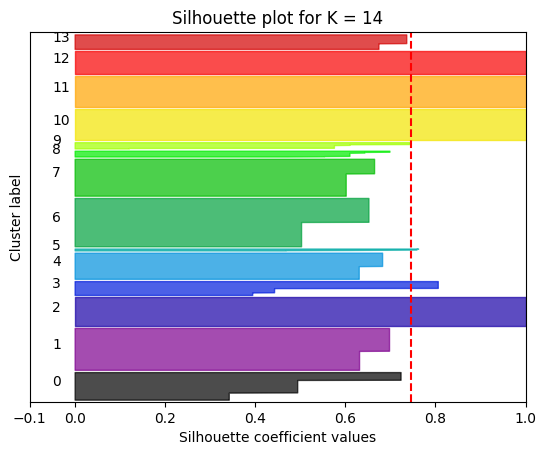

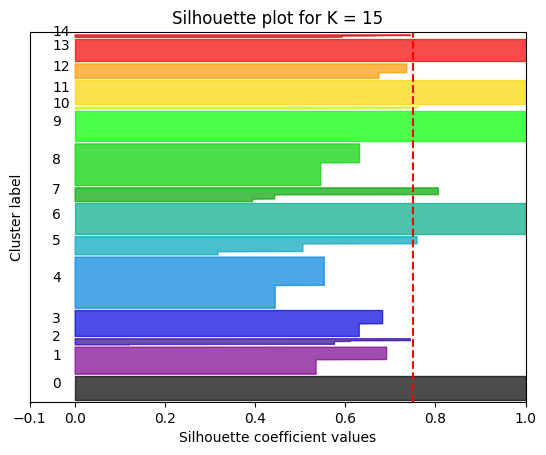

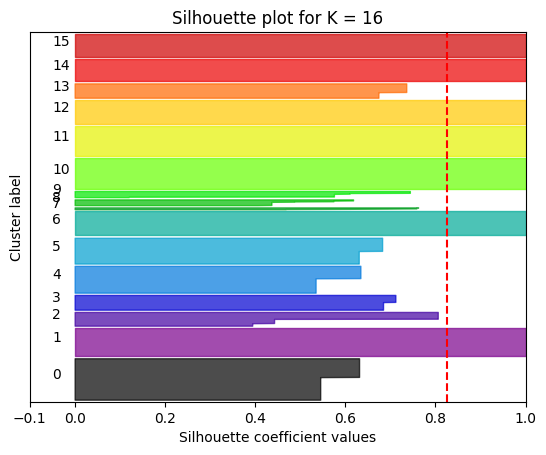

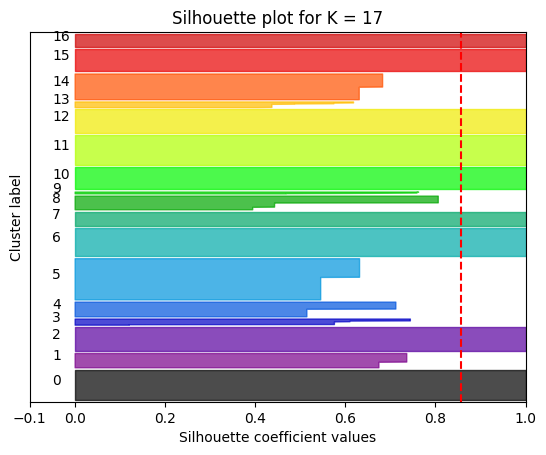

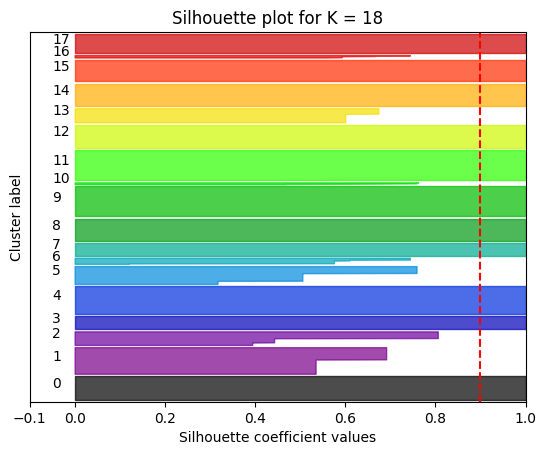

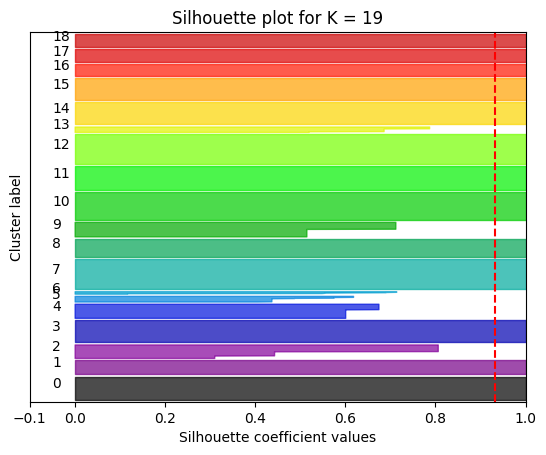

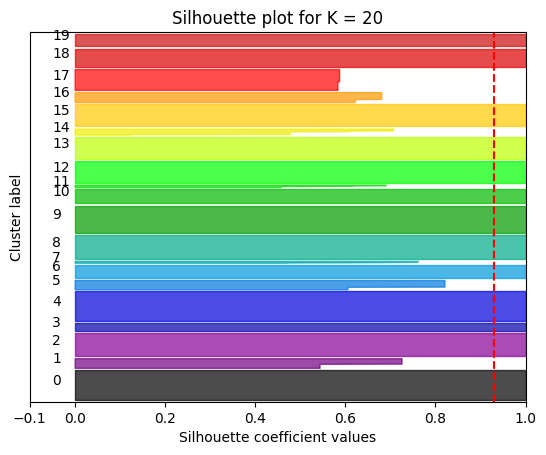

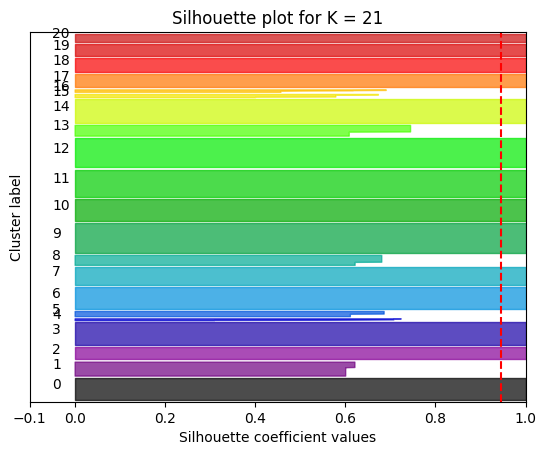

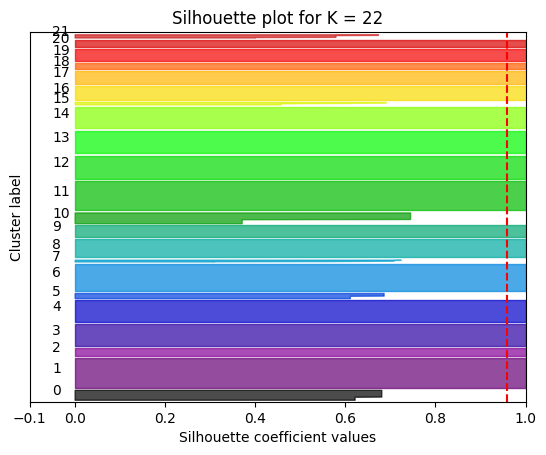

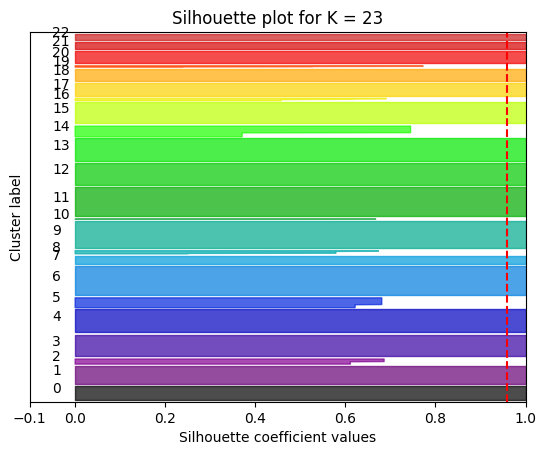

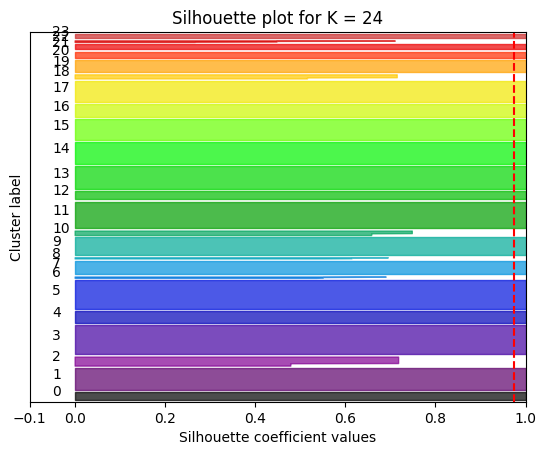

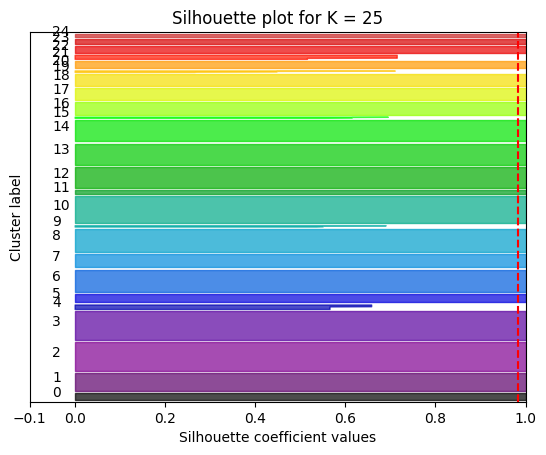

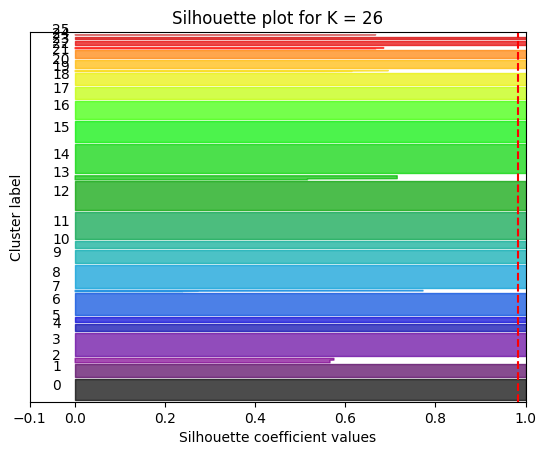

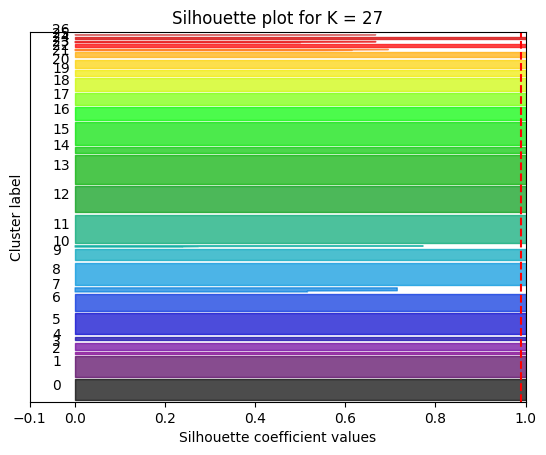

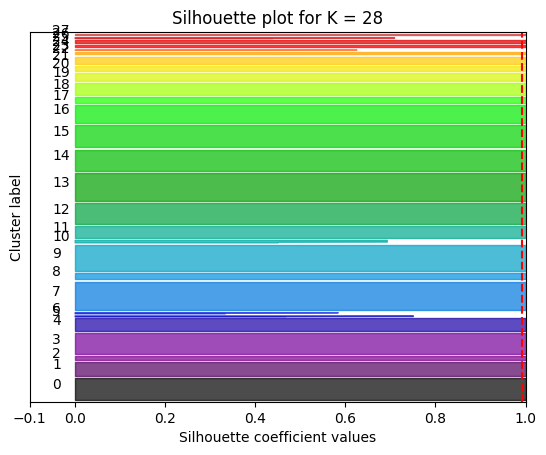

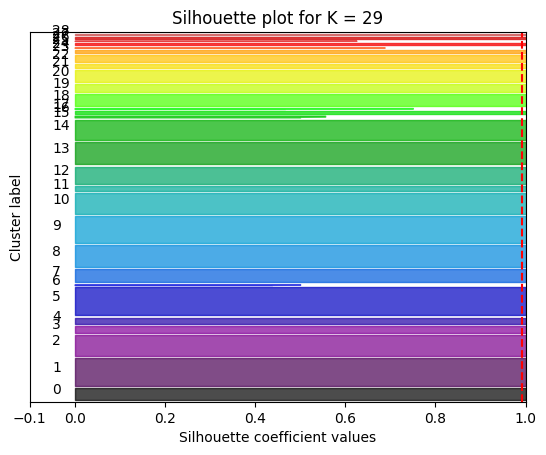

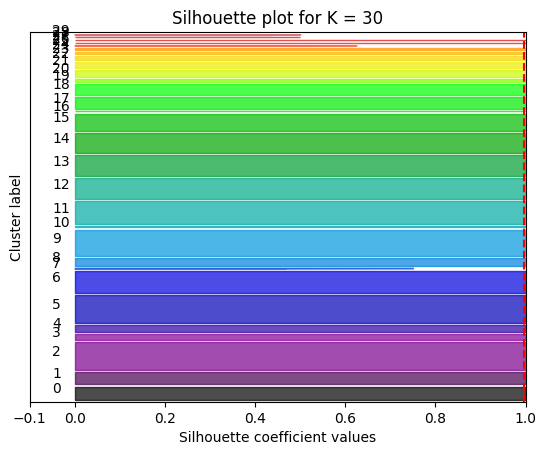

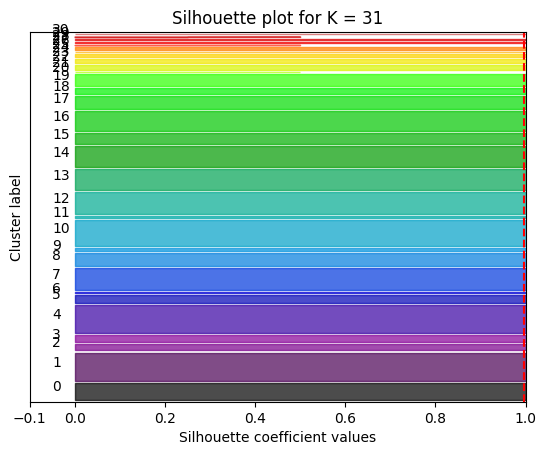

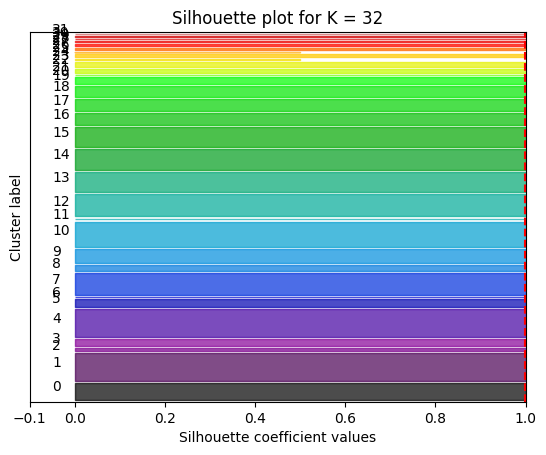

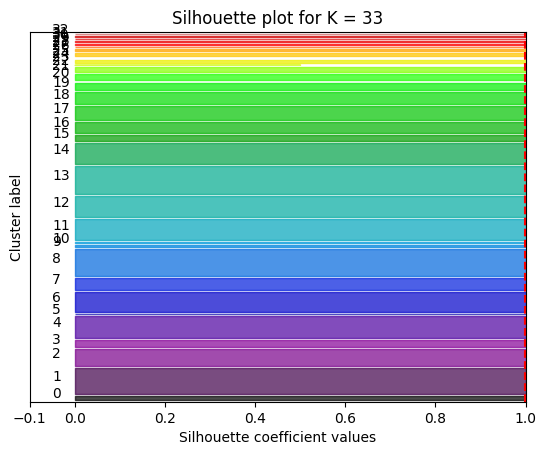

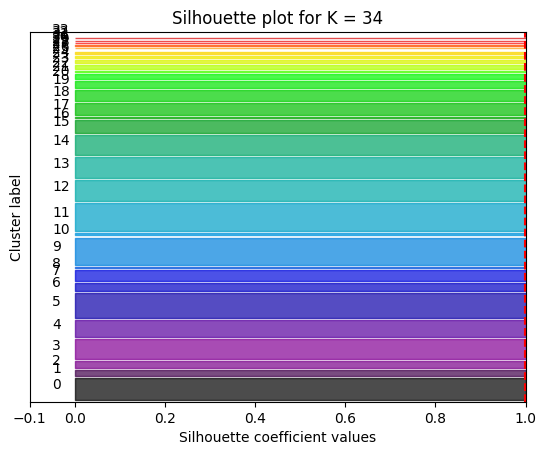

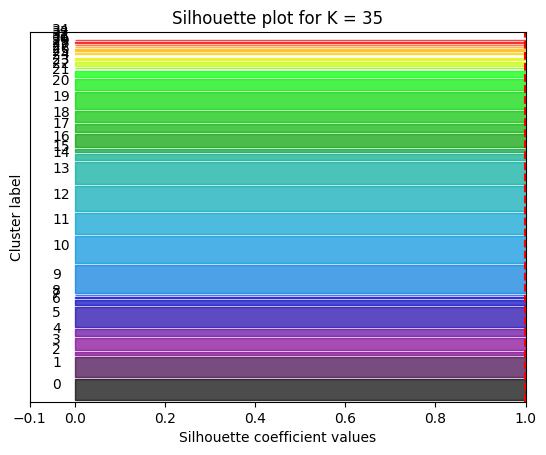

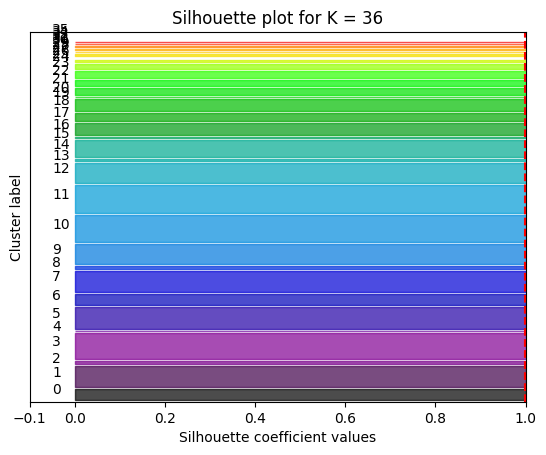

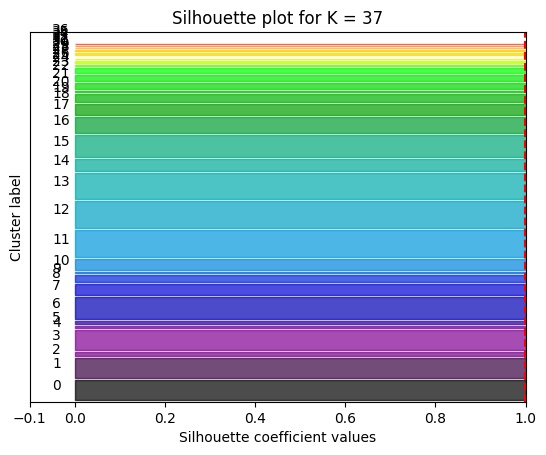

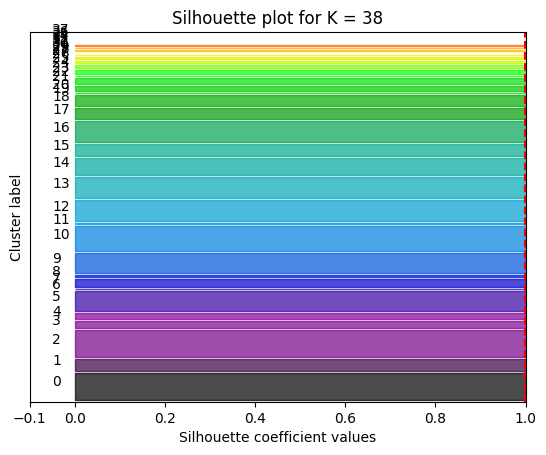

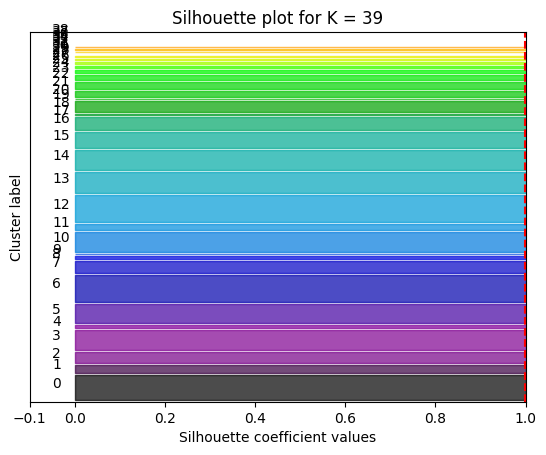

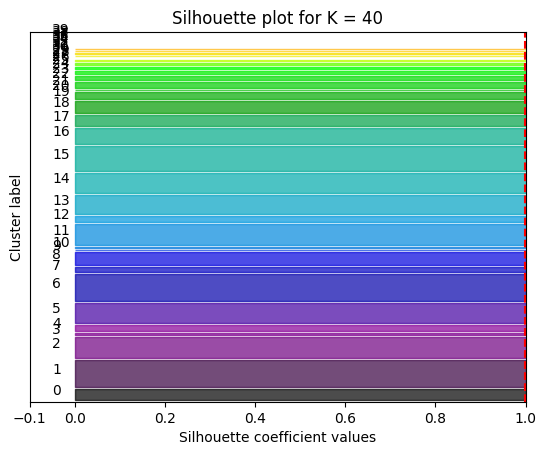

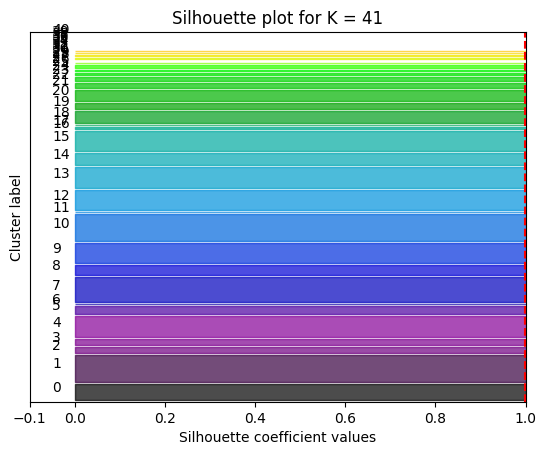

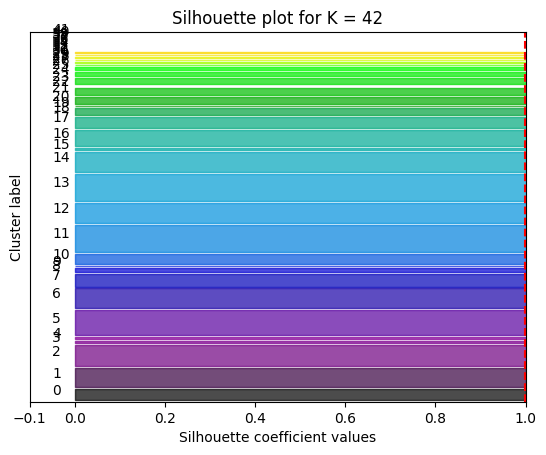

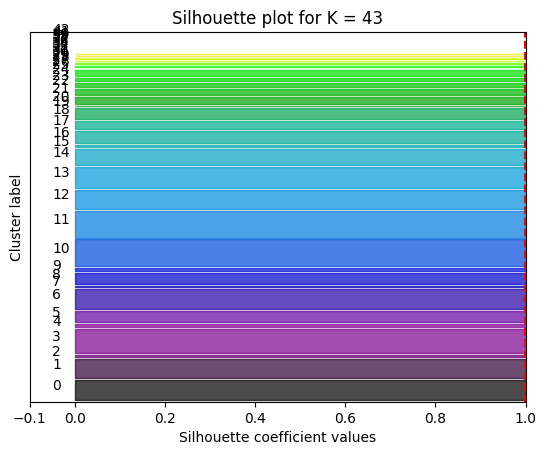

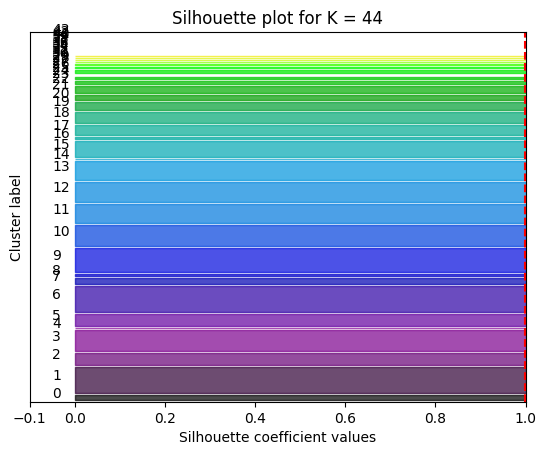

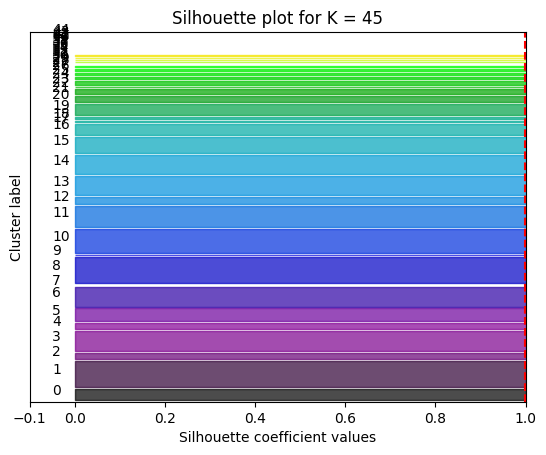

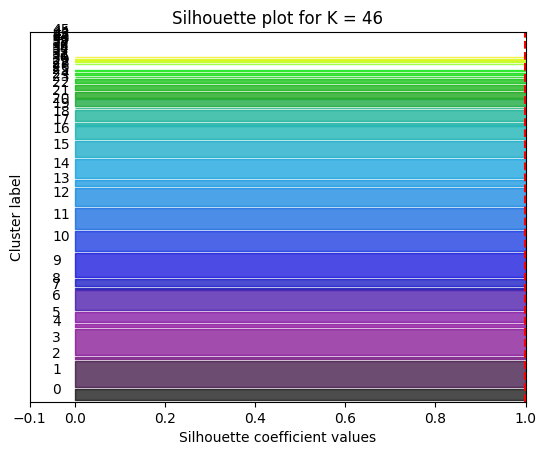

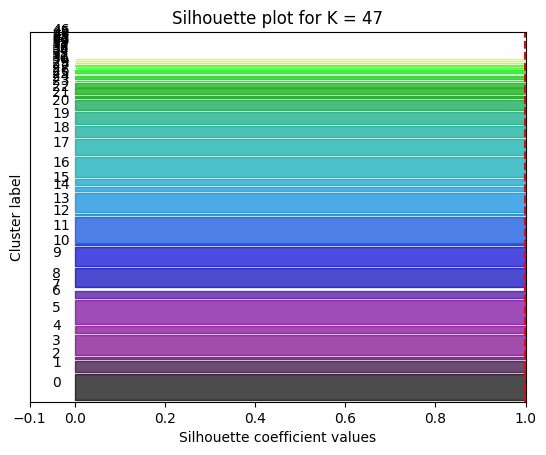

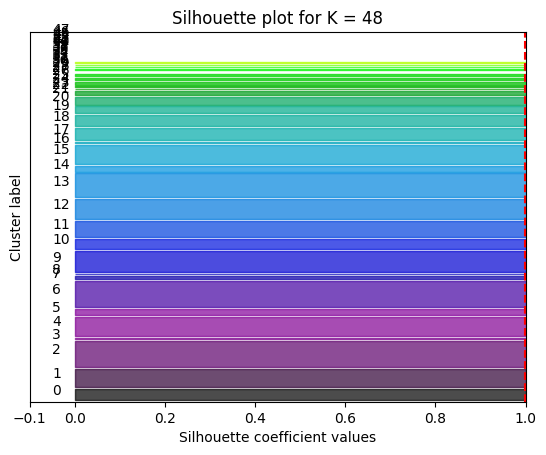

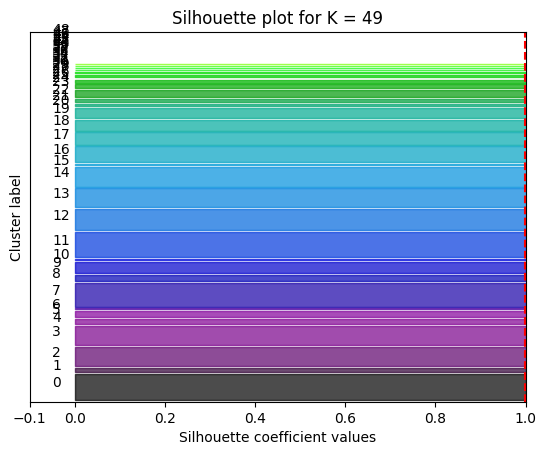

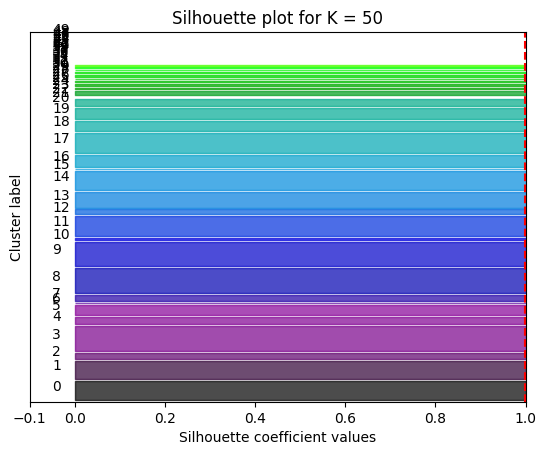

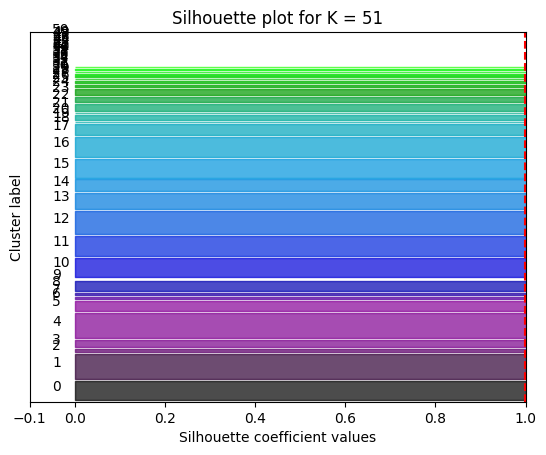

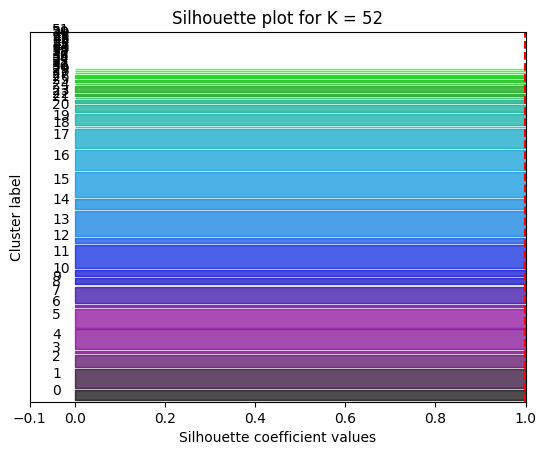

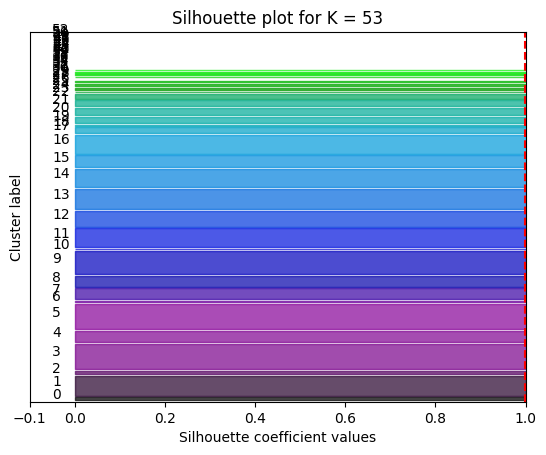

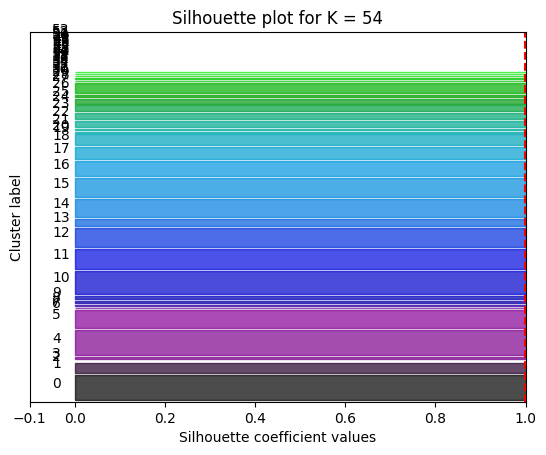

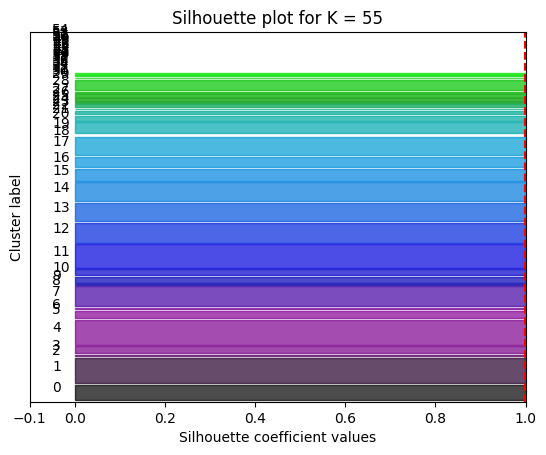

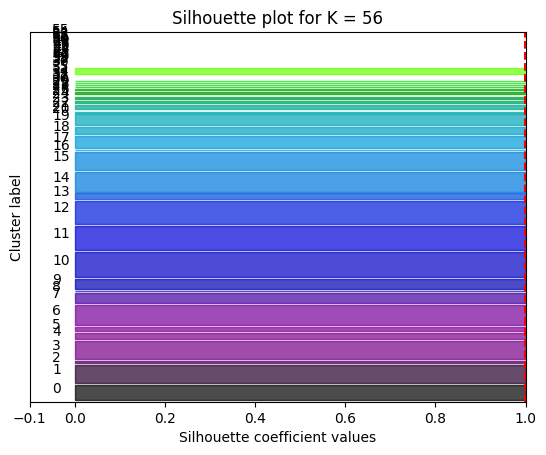

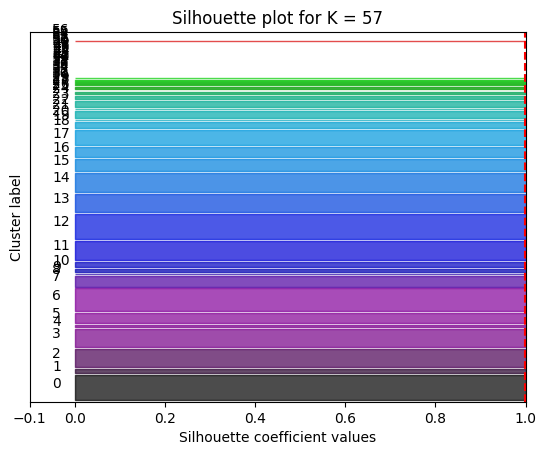

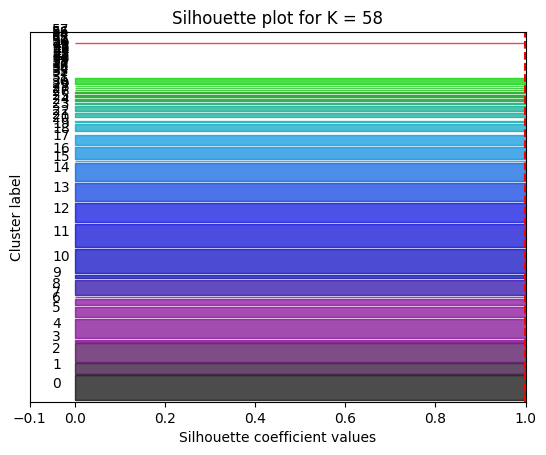

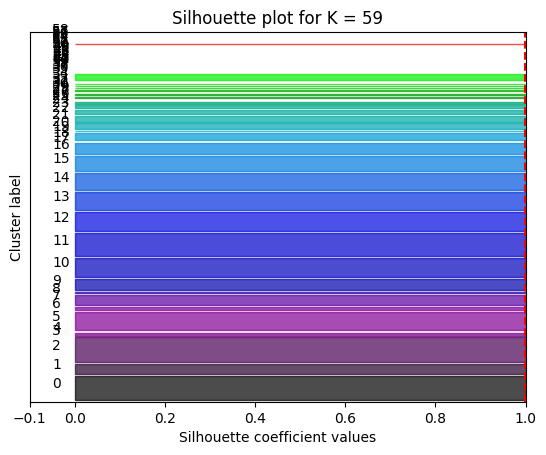

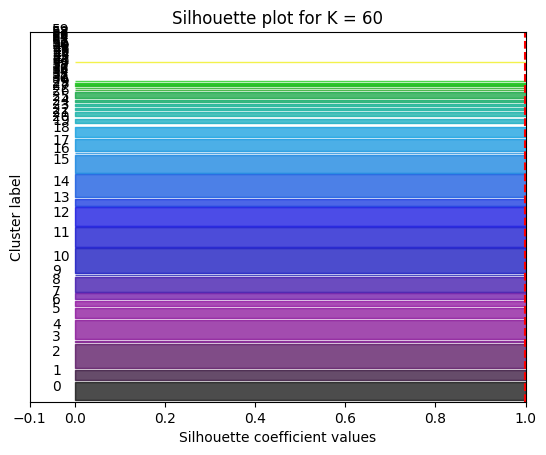

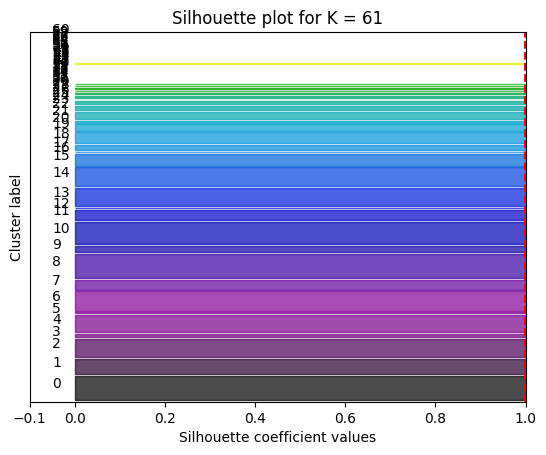

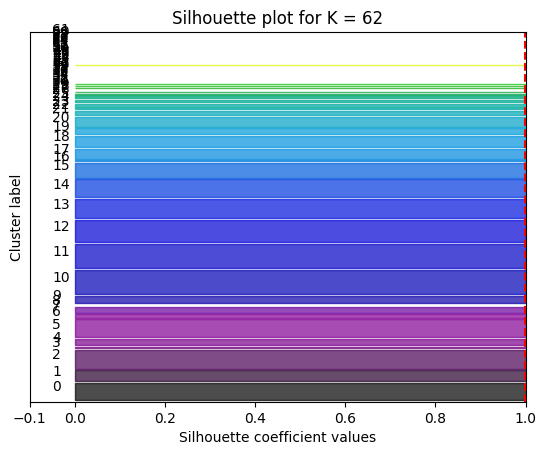

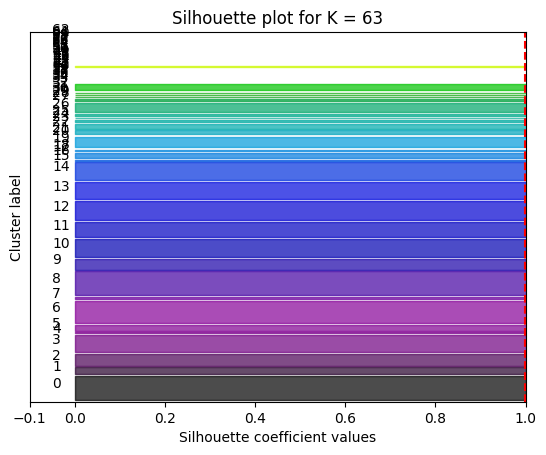

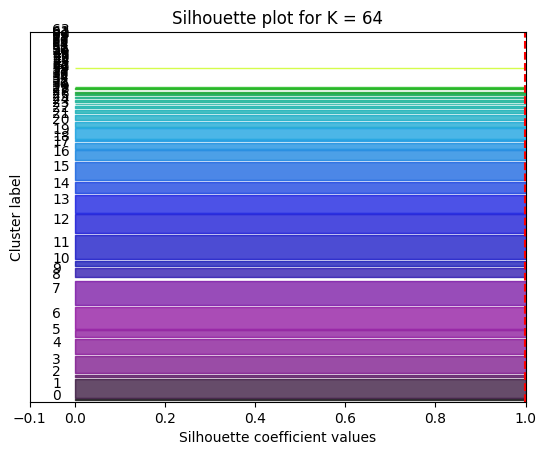

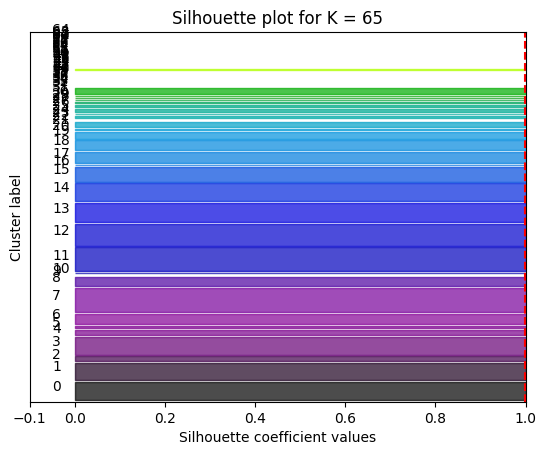

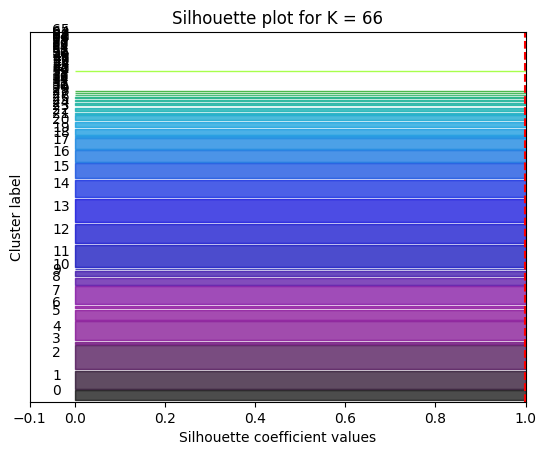

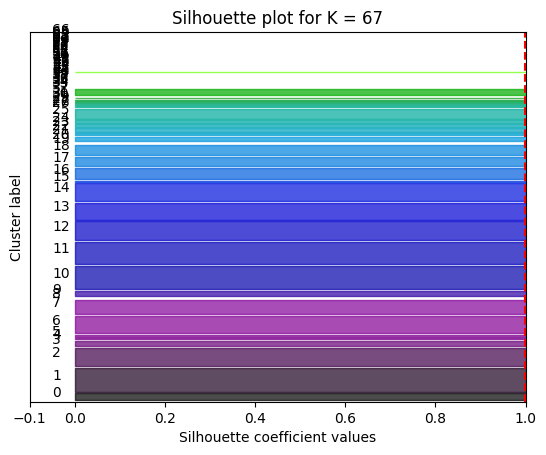

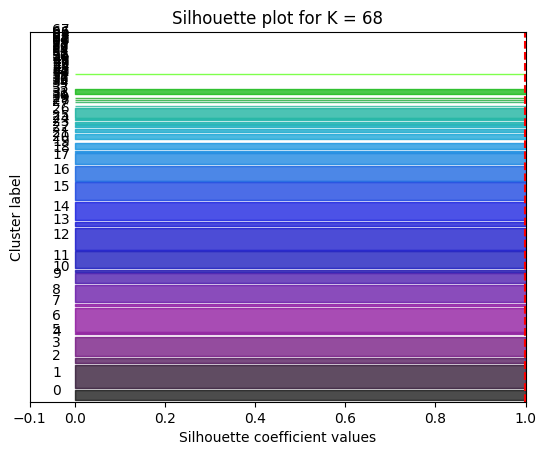

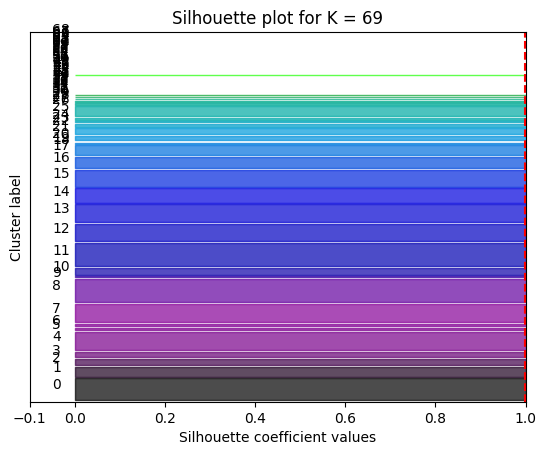

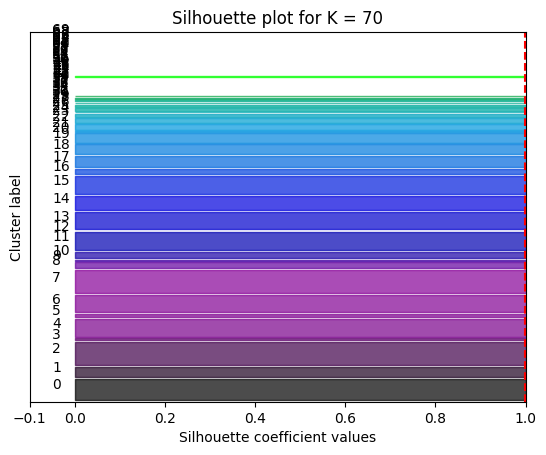

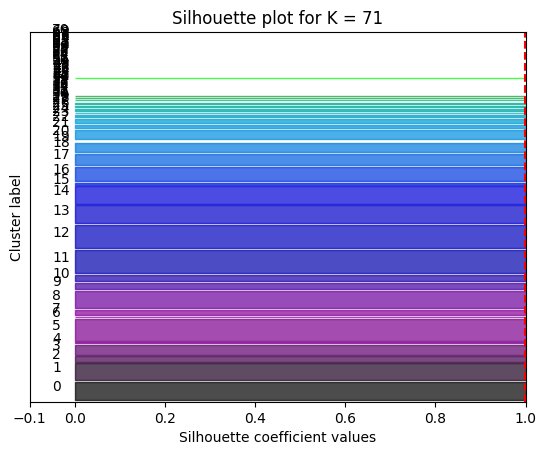

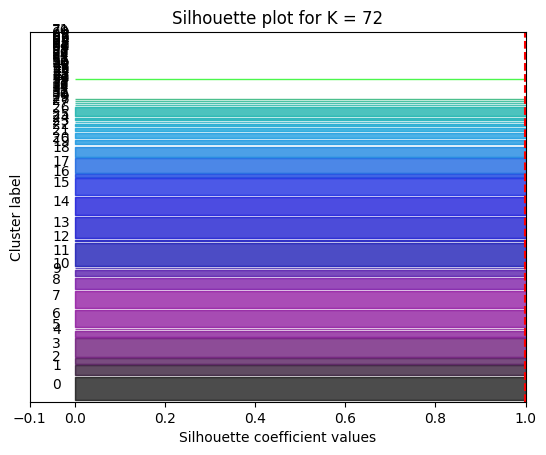

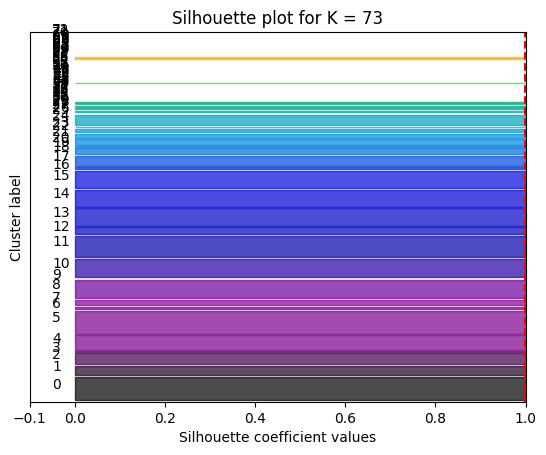

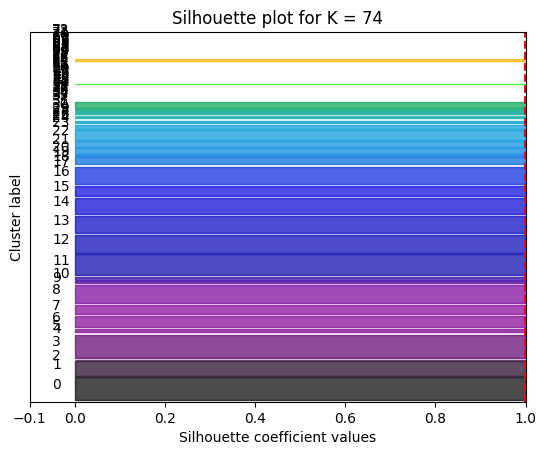

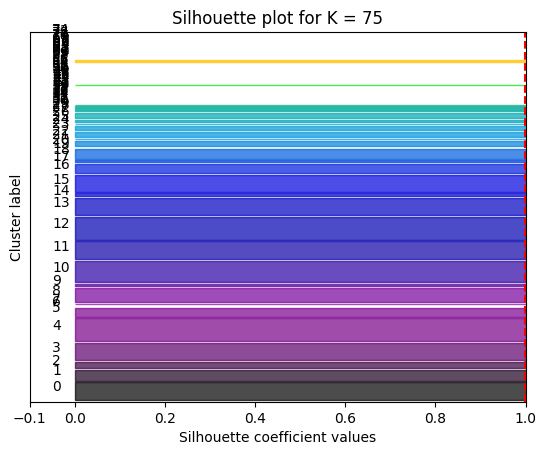

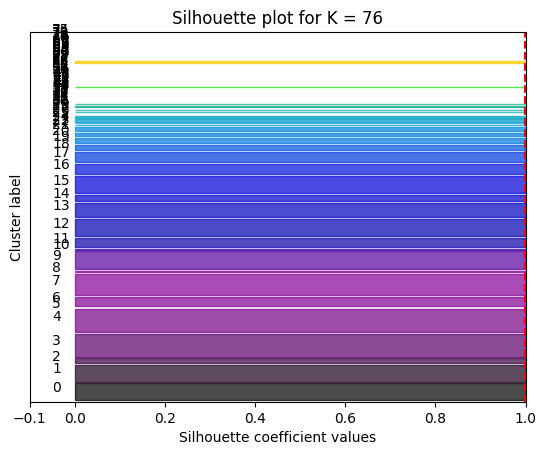

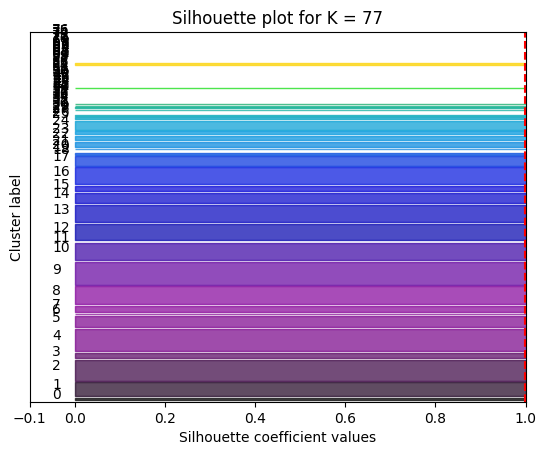

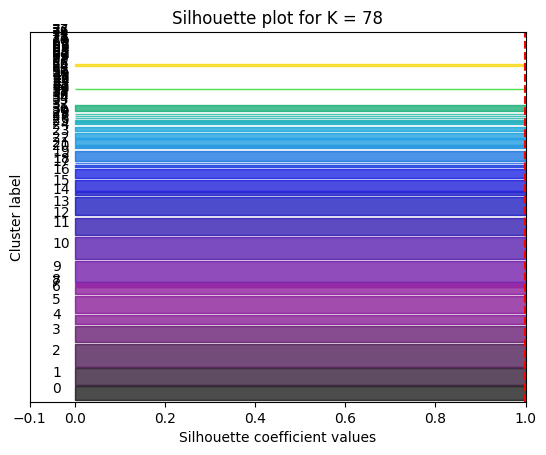

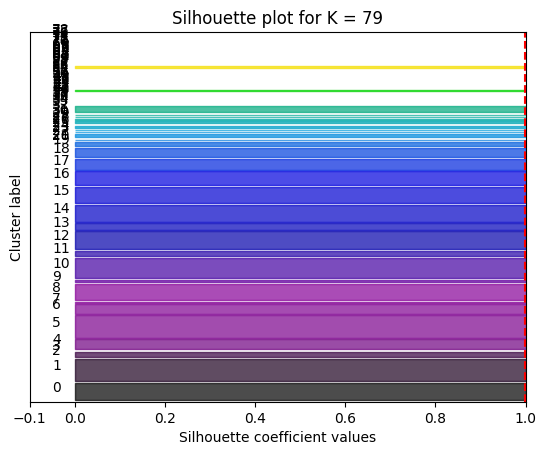

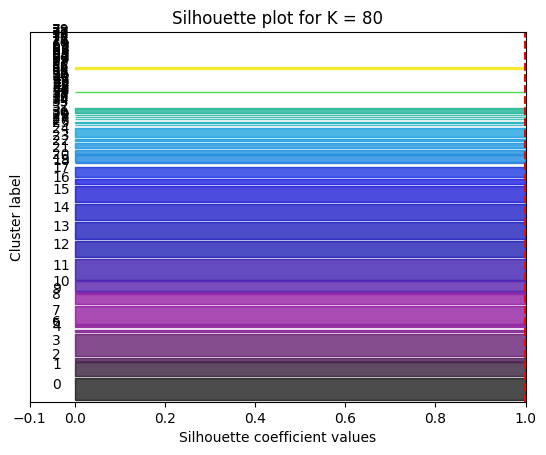

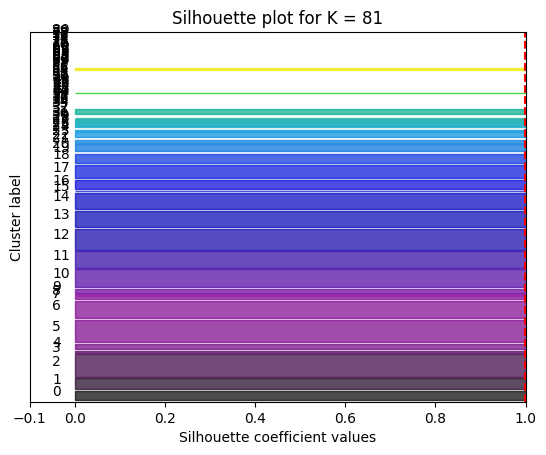

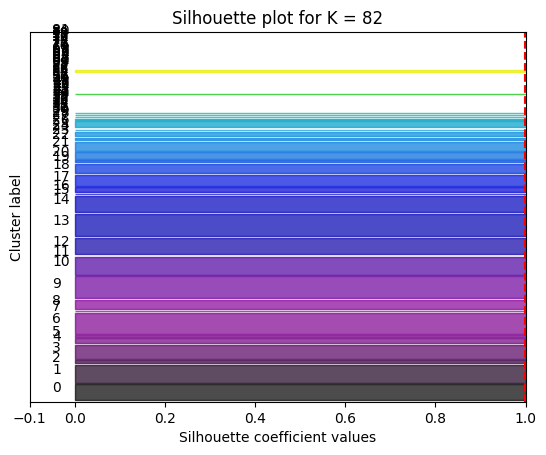

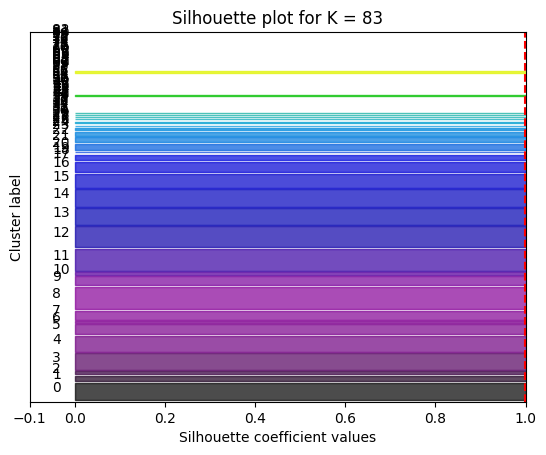

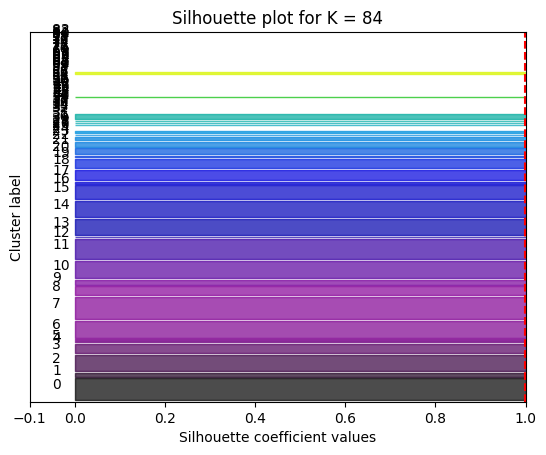

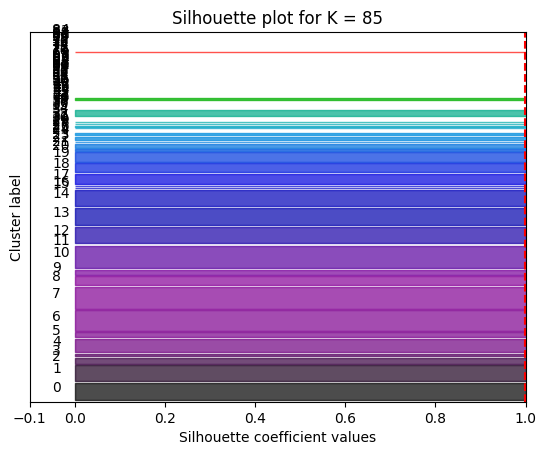

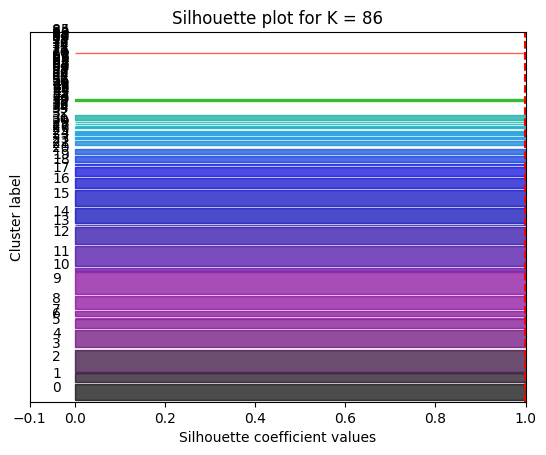

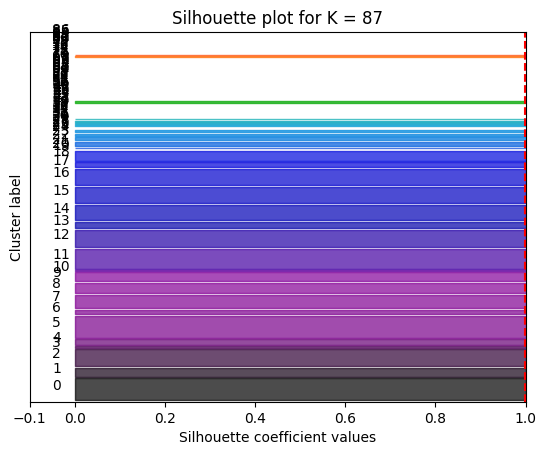

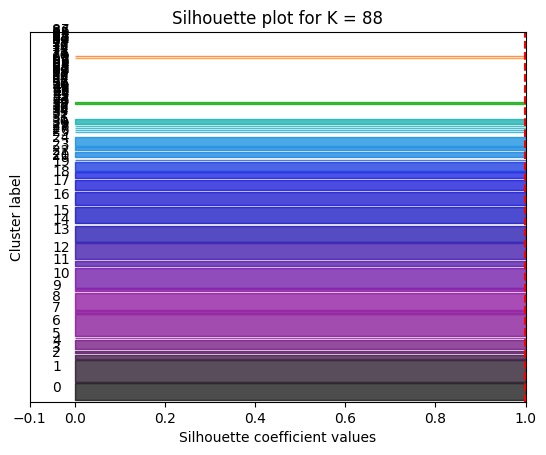

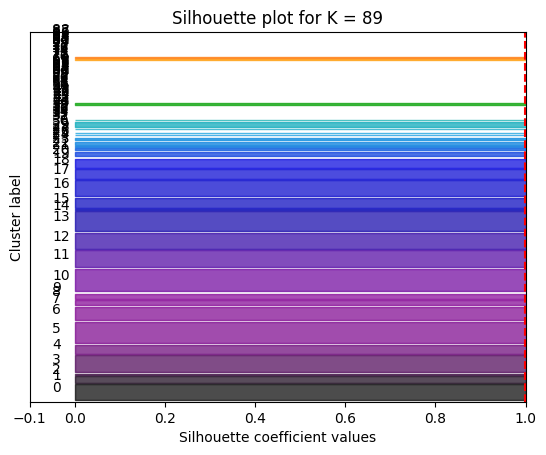

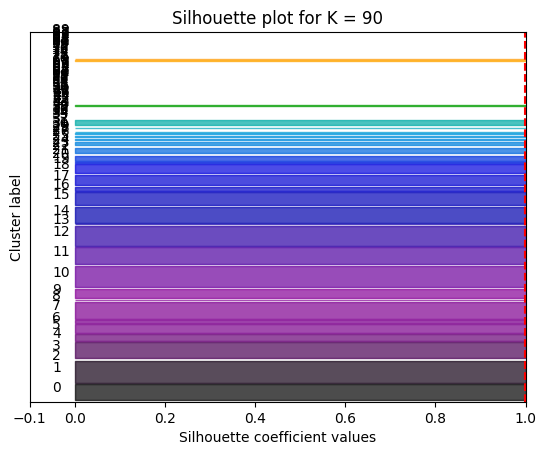

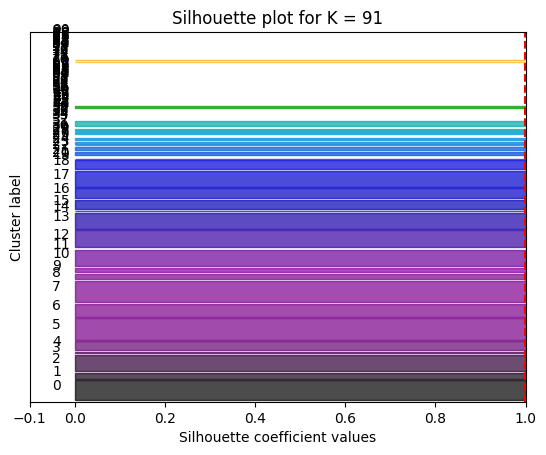

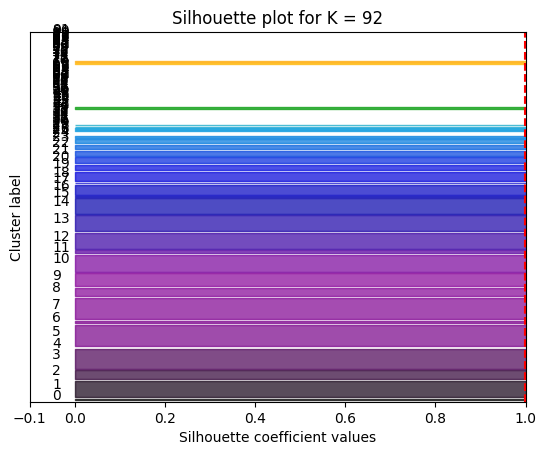

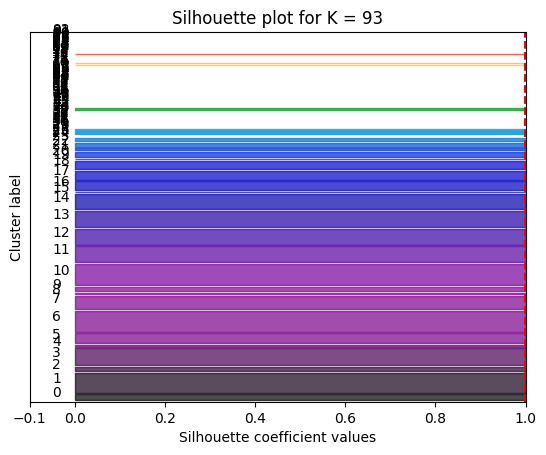

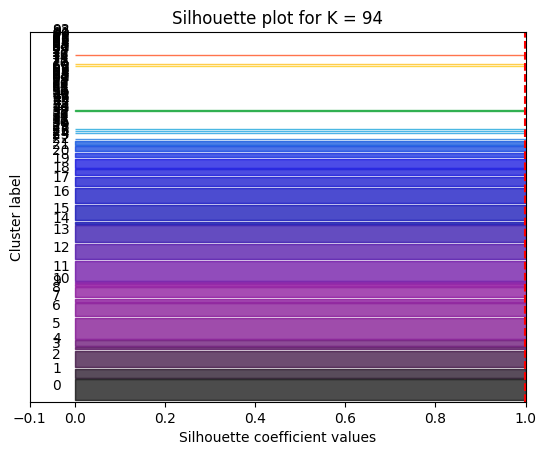

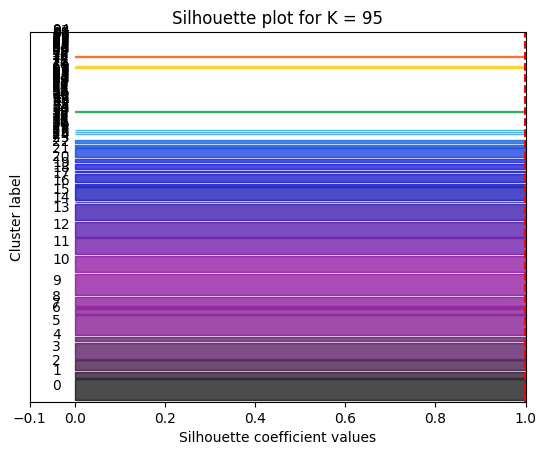

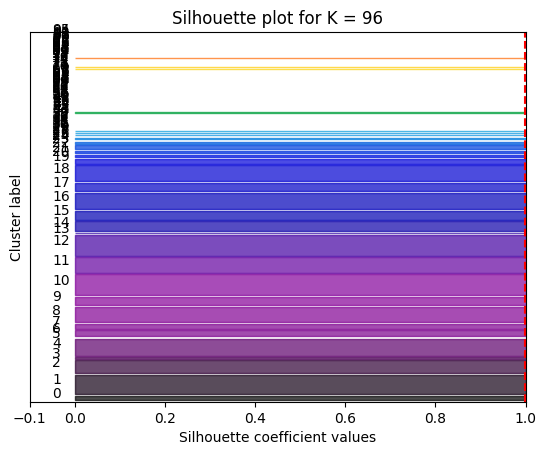

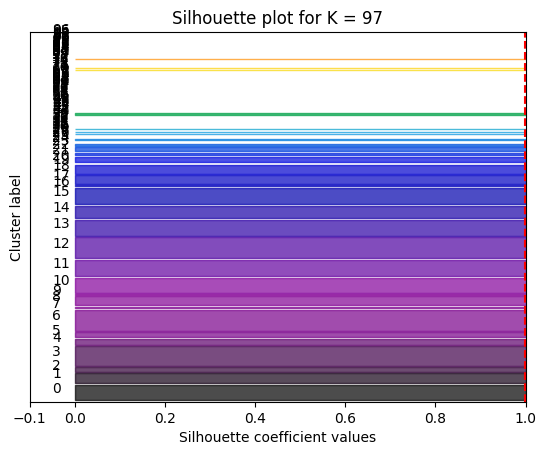

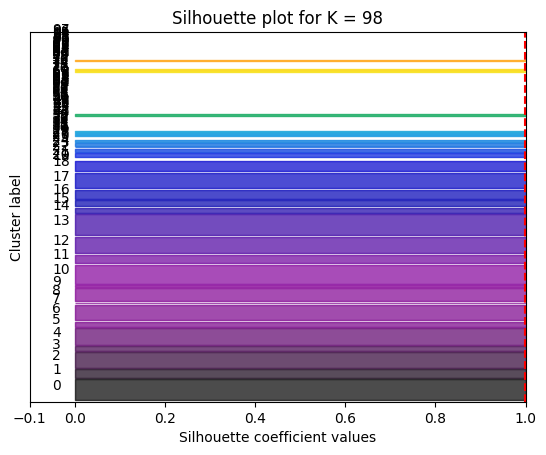

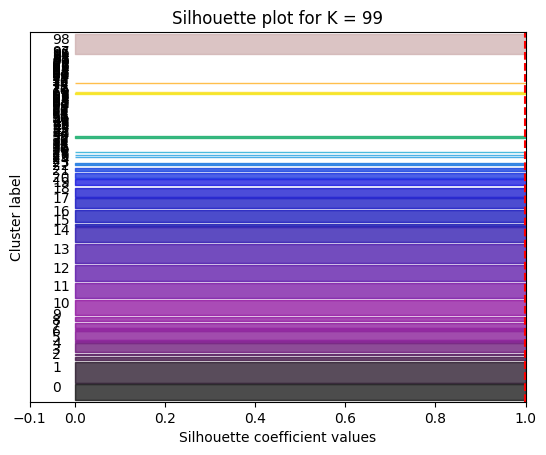

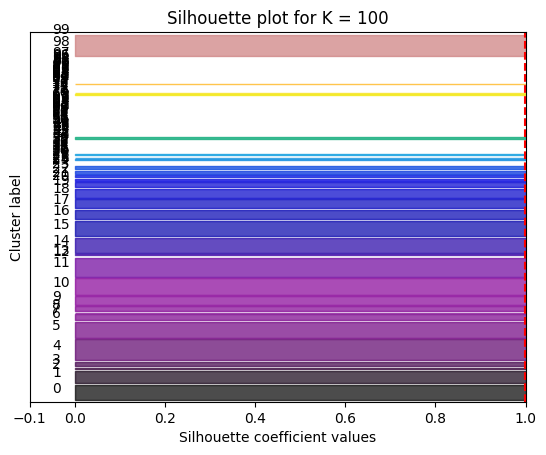

Optimal number of clusters (K) based on silhouette analysis: 33


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe with features for clustering
# Assuming features is a list of feature names or indices

# Initialize range of K values
k_range = range(2, 101)  # Example range, adjust as needed

# Prepare to store silhouette scores
silhouette_scores = []

# Iterate over each value of K
for k in k_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[features])

    # Compute silhouette score
    silhouette_avg = silhouette_score(df[features], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Compute silhouette scores for each sample (optional, for visualization)
    sample_silhouette_values = silhouette_samples(df[features], kmeans.labels_)

    # Plot silhouette plot (optional, for visualization)
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(df[features]) + (k + 1) * 10])

    y_lower = 10

    for i in range(k):
        # Aggregate silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for K = %d" % k)
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Find the optimal K with the highest average silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K) based on silhouette analysis: {optimal_k}")
